In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Set up read of csv file
netflix_path = "netflix_template.csv"

netflix_info = pd.read_csv(netflix_path)

# testing to ensure csv was read
netflix_info.head()

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...


In [16]:
# loc to find ratings and count on overall dataset
netflix_info_ratings = netflix_info['rating'].value_counts()
netflix_info_ratings

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [17]:
# find info for items added in 2014
netflix_info_2014 = netflix_info.loc[netflix_info["YEAR_added"]==2014]
netflix_info_2014 = pd.DataFrame(netflix_info_2014)
netflix_info_2014.head()


,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
914,s915,Movie,Bill Burr: I'm Sorry You Feel That Way,Jay Karas,Bill Burr,United States,NaN,NaN,2014.0,2014,TV-MA,81 min,Stand-Up Comedy,NaN,NaN,"Bill Burr escapes the zombie apocalypse, explo..."
1026,s1027,Movie,BoJack Horseman Christmas Special: Sabrina's C...,NaN,"Will Arnett, Aaron Paul, Alison Brie, Adam Con...",United States,NaN,NaN,2014.0,2014,TV-MA,26 min,Movies,NaN,NaN,"It's Christmas, and BoJack wants nothing to do..."
1309,s1310,Movie,Chelsea Handler: Uganda Be Kidding Me Live,James Yukich,Chelsea Handler,United States,NaN,NaN,2014.0,2014,TV-MA,71 min,Stand-Up Comedy,NaN,NaN,"In her first Netflix stand-up comedy special, ..."
1310,s1311,Movie,Chelsea Peretti: One of the Greats,Lance Bangs,Chelsea Peretti,United States,NaN,NaN,2014.0,2014,TV-MA,75 min,Stand-Up Comedy,NaN,NaN,"""Brooklyn Nine-Nine"" star Chelsea Peretti show..."
1902,s1903,Movie,E-Team,"Katy Chevigny, Ross Kauffman",NaN,United States,NaN,NaN,2014.0,2014,TV-MA,90 min,Documentaries,NaN,NaN,The courageous investigators of Human Rights W...


In [22]:
#Find overall count of ratings for 2014
netflix_info_2014_ratings = netflix_info_2014['rating'].value_counts()
netflix_info_2014_ratings

TV-MA    12
TV-PG     3
PG        3
TV-Y      2
TV-14     2
TV-G      1
G         1
Name: rating, dtype: int64

In [24]:
# create DFs for each rating to be used later
netflix_info_2014_tvma = netflix_info_2014.loc[netflix_info_2014["rating"]== 'TV-MA']
netflix_info_2014_tvma = pd.DataFrame(netflix_info_2014_tvma)

netflix_info_2014_tvpg = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-PG']
netflix_info_2014_tvpg =pd.DataFrame(netflix_info_2014_tvpg)

netflix_info_2014_pg = netflix_info_2014.loc[netflix_info_2014["rating"]=='PG']
netflix_info_2014_pg =pd.DataFrame(netflix_info_2014_pg)

netflix_info_2014_tvy = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-Y']
netflix_info_2014_tvy =pd.DataFrame(netflix_info_2014_tvy)

netflix_info_2014_tv14 = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-14']
netflix_info_2014_tv14 =pd.DataFrame(netflix_info_2014_tv14)

netflix_info_2014_tvg = netflix_info_2014.loc[netflix_info_2014["rating"]=='TV-G']
netflix_info_2014_tvg =pd.DataFrame(netflix_info_2014_tvg)

netflix_info_2014_g = netflix_info_2014.loc[netflix_info_2014["rating"]=='G']
netflix_info_2014_g =pd.DataFrame(netflix_info_2014_g)






In [32]:
# find percentage of each rating
percent_tvma_2014 = len(netflix_info_2014_tvma) / len(netflix_info_2014) *100
percent_tvpg_2014 = len(netflix_info_2014_tvpg) / len(netflix_info_2014) *100
percent_pg_2014 = len(netflix_info_2014_pg) / len(netflix_info_2014) *100
percent_tvy_2014 = len(netflix_info_2014_tvy) / len(netflix_info_2014) *100
percent_tv14_2014 = len(netflix_info_2014_tv14) / len(netflix_info_2014) *100
percent_tvg_2014 = len(netflix_info_2014_tvg) / len(netflix_info_2014) *100
percent_g_2014 = len(netflix_info_2014_g) / len(netflix_info_2014) *100

percentages_2014_ratings = pd.DataFrame({ 'Rating': ['TV-MA', 'TV-PG', 'PG', 'TV-Y', 'TV-14', 'TV-G', 'G'],
                                          'Percentage': [percent_tvma_2014, percent_tvpg_2014, percent_pg_2014, percent_tvy_2014,
                                                       percent_tv14_2014, percent_tvg_2014, percent_g_2014]})           
percentages_2014_ratings

,Rating,Percentage
0,TV-MA,50.000000
1,TV-PG,12.500000
2,PG,12.500000
3,TV-Y,8.333333
4,TV-14,8.333333
5,TV-G,4.166667
6,G,4.166667


Text(0.5, 1.0, 'Ratings for 2014')

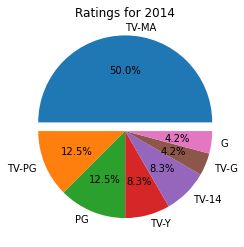

In [38]:
plt.pie(percentages_2014_ratings['Percentage'],labels = percentages_2014_ratings['Rating'],autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0))
plt.title('Ratings for 2014')